In [1]:
from pyvispoly import FieldNumber, Point, Polygon, PolygonWithHoles, VisibilityPolygonCalculator, plot_polygon
import solver
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import lzma

In [2]:
def convert_to_LinearRing(edges: list, pos: dict) -> list[Point]:
    ring = []
    cur_point = next(iter(pos))
    while len(pos):
        x, y = pos.pop(cur_point)
        ring.append(Point(x, y))
        cur_edge = [edge for edge in edges if edge[0] == cur_point or edge[1] == cur_point][0]
        cur_point = cur_edge[0] if cur_edge[1] == cur_point else cur_edge[1]
        edges.remove(cur_edge)
    return ring

In [ ]:
G = nx.parse_graphml(lzma.open('/home/yanyan/PythonProjects/CAGP-Solver/db/sbgdb-20200507/polygons/random/fpg/fpg-poly_0000000020.graphml.xz').read())
pos = {}
for node in G.nodes(data=True):
    node_location = tuple(node[1].values())
    node_location = (float(node_location[0]), float(node_location[1]))
    pos[node[0]] = node_location

ring = convert_to_LinearRing(list(G.edges()), pos)
poly = PolygonWithHoles(ring)

In [ ]:
guards = solver.generate_guard_set(poly)
witnesses = solver.generate_witness_set(poly)
graph = solver.generate_visibility_graph(guards, witnesses)

g0 g1
g0 g2
g0 g3
g0 g4
g0 g5
g0 g6
g0 g7
g0 g8
g0 g9
g0 g10
g0 g11
g0 g12
g0 g13
g0 g14
g0 g15
g0 g16
g0 g17
g0 g18
g0 g19
g1 g0
g1 g2
g1 g3
g1 g4
g1 g5
g1 g6
g1 g7
g1 g8
g1 g9
g1 g10
g1 g11
g1 g12
g1 g13
g1 g14
g1 g15
g1 g16
g1 g17
g1 g18
g1 g19
g2 g0
g2 g1
g2 g3
g2 g4
g2 g5
g2 g6
g2 g7
g2 g8
g2 g9
g2 g10
g2 g11
g2 g12
g2 g13
g2 g14
g2 g15
g2 g16
g2 g17
g2 g18
g2 g19
g3 g0
g3 g1
g3 g2
g3 g4
g3 g5
g3 g6
g3 g7
g3 g8
g3 g9
g3 g10
g3 g11
g3 g12
g3 g13
g3 g14
g3 g15
g3 g16
g3 g17
g3 g18
g3 g19
g4 g0
g4 g1
g4 g2
g4 g3
g4 g5
g4 g6
g4 g7
g4 g8
g4 g9
g4 g10
g4 g11
g4 g12
g4 g13
g4 g14
g4 g15
g4 g16
g4 g17
g4 g18
g4 g19
g5 g0
g5 g1
g5 g2
g5 g3
g5 g4
g5 g6
g5 g7
g5 g8
g5 g9
g5 g10
g5 g11
g5 g12
g5 g13
g5 g14
g5 g15
g5 g16
g5 g17
g5 g18
g5 g19
g6 g0
g6 g1
g6 g2
g6 g3
g6 g4
g6 g5
g6 g7
g6 g8
g6 g9
g6 g10
g6 g11
g6 g12
g6 g13
g6 g14
g6 g15
g6 g16
g6 g17
g6 g18
g6 g19
g7 g0
g7 g1
g7 g2
g7 g3
g7 g4
g7 g5
g7 g6
g7 g8
g7 g9
g7 g10
g7 g11
g7 g12
g7 g13
g7 g14
g7 g15
g7 g16
g7 g17
g7 g18
g7 g19
g8 g0
g8

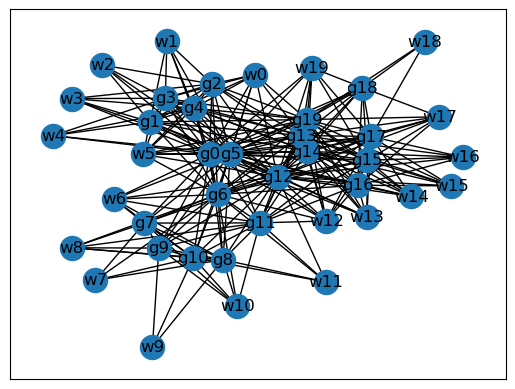

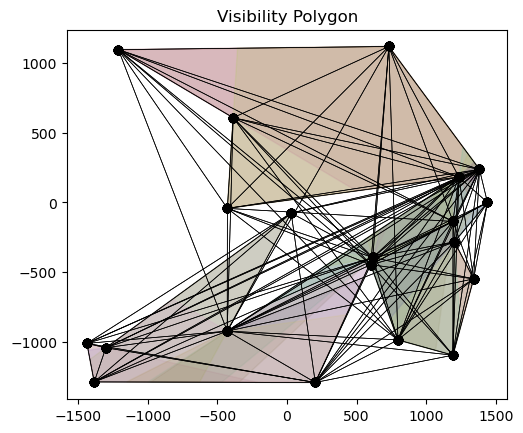

In [3]:
fig, ax = plt.subplots()
# plot_polygon(poly, ax=ax, color="lightgrey")

vis_poly_calc = VisibilityPolygonCalculator(poly)

vis_polygons = {}

for point in ring:
    vis_poly = vis_poly_calc.compute_visibility_polygon(point)
    plot_polygon(vis_poly, ax=ax, color=np.random.rand(3,), alpha=0.1)
    vis_polygons[(float(point.x()), float(point.y()))] = PolygonWithHoles(vis_poly)

keys = list(vis_polygons)
for point1 in keys:
    color = np.random.rand(3,)
    for point2 in keys:
        if point1 == point2:
            continue
        if not vis_polygons.get(point1).difference(vis_polygons.get(point2)):
            x, y = [point1[0], point2[0]], [point1[1], point2[1]]
            plt.plot(x, y, marker = 'o', color='black', linewidth=0.5)
            continue
        if vis_polygons.get(point1).difference(vis_polygons.get(point2))[0].outer_boundary().area() < vis_polygons.get(point1).outer_boundary().area():
            x, y = [point1[0], point2[0]], [point1[1], point2[1]]
            plt.plot(x, y, marker = 'o', color='black', linewidth=0.5)

plt.rcParams['figure.dpi']=100
ax.set_aspect('equal')
plt.title("Visibility Polygon")
plt.show()
